## Import necessary libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import klib
import numpy as np
%matplotlib inline

## Dataset import and dataset info

In [16]:
df = pd.read_csv("C:\\Users\\harsh\\Desktop\\Python Projects\\Chicago traffic analysis\\Traffic_crashes.csv")

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,885766.000000,1.990170e+05,885766.000000,885761.000000,885766.000000,883812.000000,883812.000000,883812.000000,883812.000000,883812.000000,883812.000000,883812.0,885766.000000,885766.000000,885766.000000,879428.000000,879428.000000
mean,28.419396,1.332970e+01,3687.729362,1244.924770,2.035207,0.193857,0.001190,0.019796,0.108760,0.064111,2.001170,0.0,13.203195,4.120372,6.662988,41.855152,-87.673731
std,6.117060,2.961542e+03,2880.404929,704.924219,0.452197,0.571895,0.037438,0.164787,0.425336,0.325509,1.157192,0.0,5.572834,1.981429,3.363330,0.333184,0.676770
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1251.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783114,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674243
75%,30.000000,4.000000e+00,5562.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924534,-87.633543
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [5]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885766 entries, 0 to 885765
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                885766 non-null  object 
 1   CRASH_DATE_EST_I               65545 non-null   object 
 2   CRASH_DATE                     885766 non-null  object 
 3   POSTED_SPEED_LIMIT             885766 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         885766 non-null  object 
 5   DEVICE_CONDITION               885766 non-null  object 
 6   WEATHER_CONDITION              885766 non-null  object 
 7   LIGHTING_CONDITION             885766 non-null  object 
 8   FIRST_CRASH_TYPE               885766 non-null  object 
 9   TRAFFICWAY_TYPE                885766 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      885766 non-null  object 
 12  ROADWAY_SURFACE_COND          

## Data Cleaning
Checking for missing values and filling it with relevant values

<Axes: >

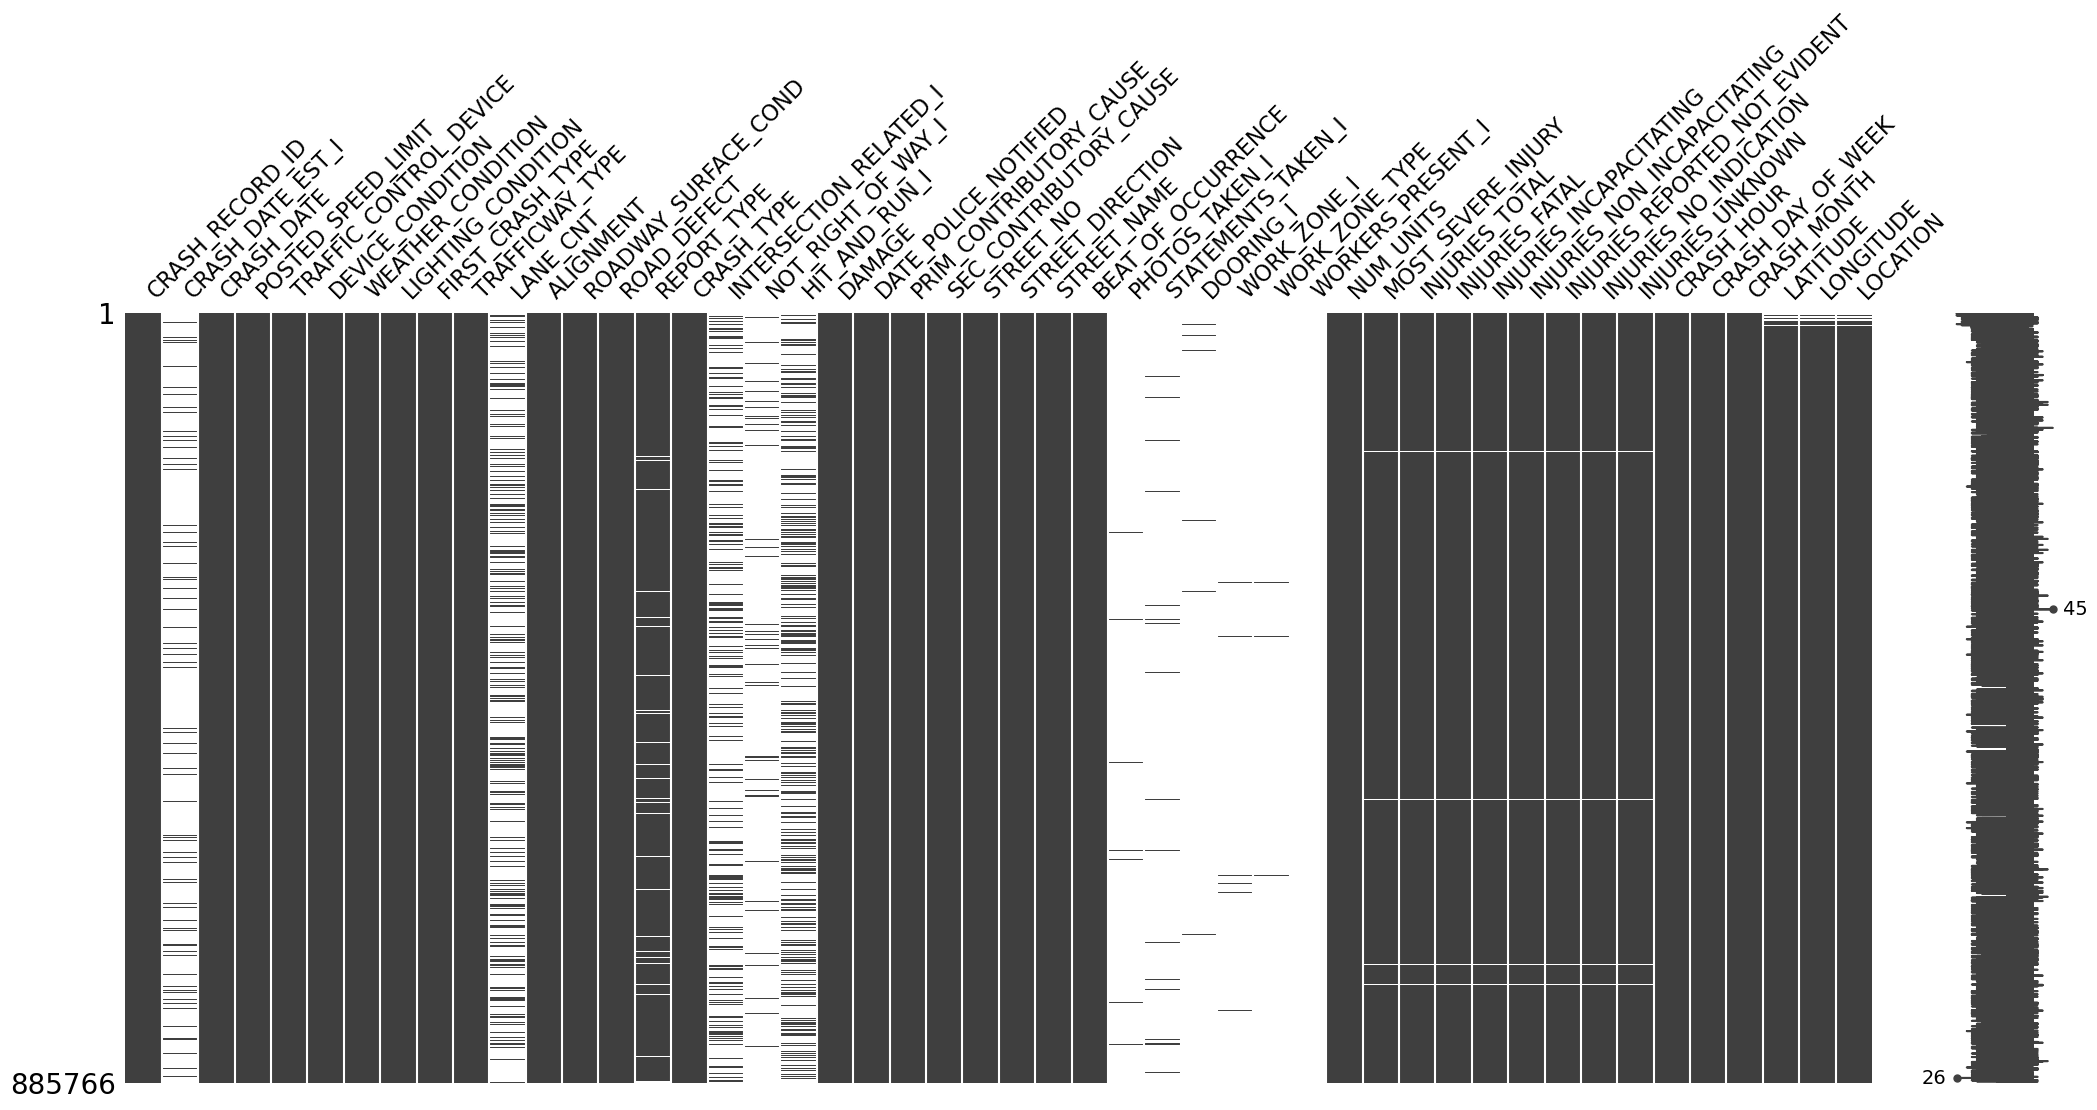

In [7]:
msno.matrix(df)

In [8]:
non_null_counts = df.notnull().sum()

# Display the non-null value counts
print("Non-Null Value Counts:")
print(non_null_counts)

Non-Null Value Counts:
CRASH_RECORD_ID                  885766
CRASH_DATE_EST_I                  65545
CRASH_DATE                       885766
POSTED_SPEED_LIMIT               885766
TRAFFIC_CONTROL_DEVICE           885766
DEVICE_CONDITION                 885766
WEATHER_CONDITION                885766
LIGHTING_CONDITION               885766
FIRST_CRASH_TYPE                 885766
TRAFFICWAY_TYPE                  885766
LANE_CNT                         199017
ALIGNMENT                        885766
ROADWAY_SURFACE_COND             885766
ROAD_DEFECT                      885766
REPORT_TYPE                      858473
CRASH_TYPE                       885766
INTERSECTION_RELATED_I           203259
NOT_RIGHT_OF_WAY_I                40426
HIT_AND_RUN_I                    277791
DAMAGE                           885766
DATE_POLICE_NOTIFIED             885766
PRIM_CONTRIBUTORY_CAUSE          885766
SEC_CONTRIBUTORY_CAUSE           885766
STREET_NO                        885766
STREET_DIRECTION 

GridSpec(6, 6)

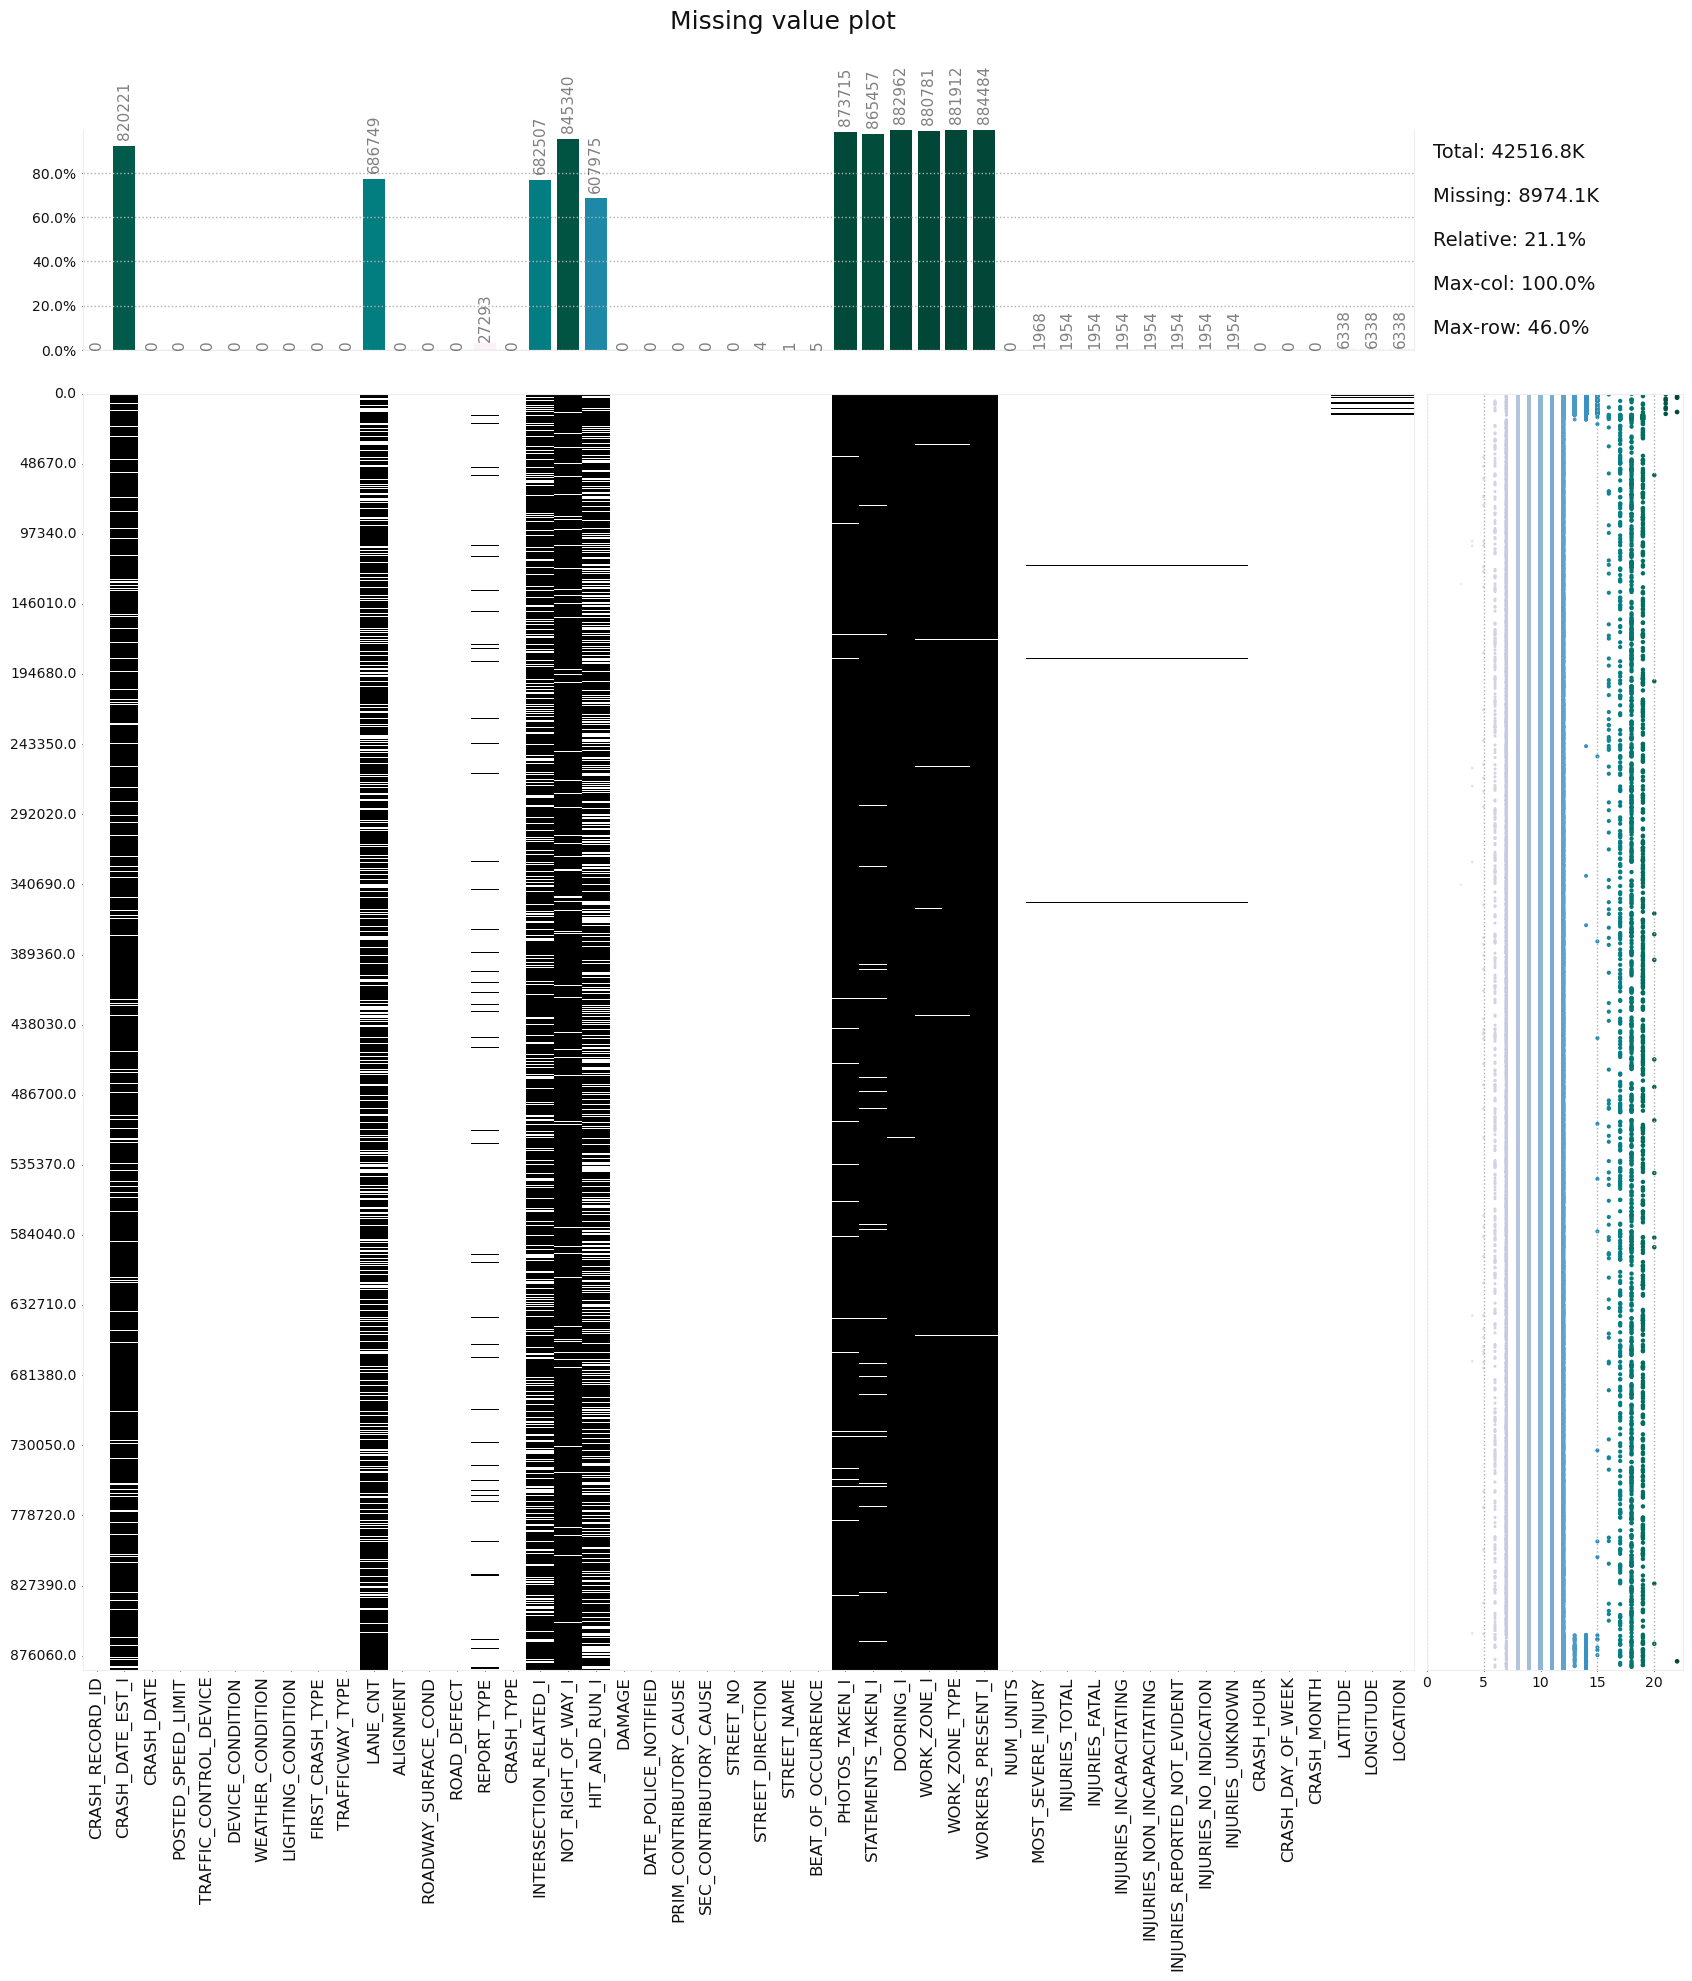

In [9]:
klib.missingval_plot(df)

In [24]:
# Fill missing values in these columns with N value, assuming it's the default
df.fillna({
    'intersection_related_i':'N',
    'not_right_of_way_i':'N',
    'hit_and_run_i':'N'
}, inplace=True)

In [18]:
df = klib.clean_column_names(df)

In [19]:
# Set these columns to 0 wherever injuries_total is missing and crash_type is no injury
df.loc[((df.injuries_total.isna()) & (df.crash_type == 'NO INJURY / DRIVE AWAY')),[
          'injuries_total',
          'injuries_fatal',
          'injuries_incapacitating',
          'injuries_no_indication',
          'injuries_unknown'
         ]] = 0

In [20]:
# Drop unwanted columns
df.drop(columns=[
    'crash_record_id','crash_date_est_i','lane_cnt','location','report_type', 'date_police_notified',
    'photos_taken_i','statements_taken_i','dooring_i','work_zone_i','work_zone_type','workers_present_i',
#    'intersection_related_i','not_right_of_way_i','hit_and_run_i', # don't drop these anymore
], inplace=True)

In [21]:
# Drop rows where injuries_total is missing
df.drop(df[df.injuries_total.isna()].index, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877470 entries, 2 to 885765
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     877470 non-null  object 
 1   posted_speed_limit             877470 non-null  int64  
 2   traffic_control_device         877470 non-null  object 
 3   device_condition               877470 non-null  object 
 4   weather_condition              877470 non-null  object 
 5   lighting_condition             877470 non-null  object 
 6   first_crash_type               877470 non-null  object 
 7   trafficway_type                877470 non-null  object 
 8   alignment                      877470 non-null  object 
 9   roadway_surface_cond           877470 non-null  object 
 10  road_defect                    877470 non-null  object 
 11  crash_type                     877470 non-null  object 
 12  intersection_related_i         8774

In [35]:
df = df.dropna(axis = 0, how='any')

In [38]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [66]:
df['i'] = df.index

In [76]:
# Extract min and max values from longitude and latitude
long_min = df['longitude'].min()
long_max = df['longitude'].max()
lat_min = df['latitude'].min()
lat_max = df['latitude'].max()

# Print the results
print(f"Longitude Min: {long_min}, Longitude Max: {long_max}")
print(f"Latitude Min: {lat_min}, Latitude Max: {lat_max}")


Longitude Min: -87.936192947, Longitude Max: 0.0
Latitude Min: 0.0, Latitude Max: 42.022779861


In [77]:
# Filter rows where both longitude and latitude are 0
zero_coords = df[(df['longitude'] == 0) & (df['latitude'] == 0)]

# Count how many such rows exist
zero_count = zero_coords.shape[0]

# Print the result
print(f"Number of records with (longitude, latitude) as (0, 0): {zero_count}")


Number of records with (longitude, latitude) as (0, 0): 52


In [78]:
# Drop rows where latitude or longitude is 0
df_cleaned = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Optionally, update the original DataFrame
df = df_cleaned.reset_index(drop=True)

# Print the number of remaining rows
print(f"Number of remaining records: {df.shape[0]}")


Number of remaining records: 877418


# Stat analysis

In [39]:
df.describe()

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude
count,877470.000000,877470.000000,877470.000000,877470.000000,877470.000000,877470.000000,877470.00000,877470.000000,877470.000000,877470.000000,877470.0,877470.000000,877470.000000,877470.000000,877470.000000,877470.000000
mean,28.438097,3693.430786,1244.913830,2.036535,0.193956,0.001191,0.01981,0.108834,0.064121,2.001055,0.0,13.208797,4.121695,6.662754,41.855178,-87.673734
std,6.073096,2833.483278,705.518191,0.450928,0.571703,0.037467,0.16475,0.425360,0.325392,1.157591,0.0,5.566672,1.981161,3.363313,0.333528,0.677519
min,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,1300.000000,715.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783199,-87.721830
50%,30.000000,3202.000000,1212.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874978,-87.674256
75%,30.000000,5570.750000,1822.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924541,-87.633558
max,99.000000,13799.000000,2535.000000,18.000000,21.000000,4.000000,10.00000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [40]:
# Group by weather condition and calculate mean injuries
weather_injury_stats = df.groupby('weather_condition')['injuries_total'].mean().reset_index()
print(weather_injury_stats)

           weather_condition  injuries_total
0   BLOWING SAND, SOIL, DIRT        0.285714
1               BLOWING SNOW        0.231132
2                      CLEAR        0.198740
3            CLOUDY/OVERCAST        0.211503
4             FOG/SMOKE/HAZE        0.260674
5      FREEZING RAIN/DRIZZLE        0.249416
6                      OTHER        0.256401
7                       RAIN        0.237179
8     SEVERE CROSS WIND GATE        0.186047
9                 SLEET/HAIL        0.231610
10                      SNOW        0.162694
11                   UNKNOWN        0.062427


In [41]:
# Frequency distribution of crash types
crash_type_counts = df['crash_type'].value_counts()
print(crash_type_counts)

crash_type
NO INJURY / DRIVE AWAY              641639
INJURY AND / OR TOW DUE TO CRASH    235831
Name: count, dtype: int64


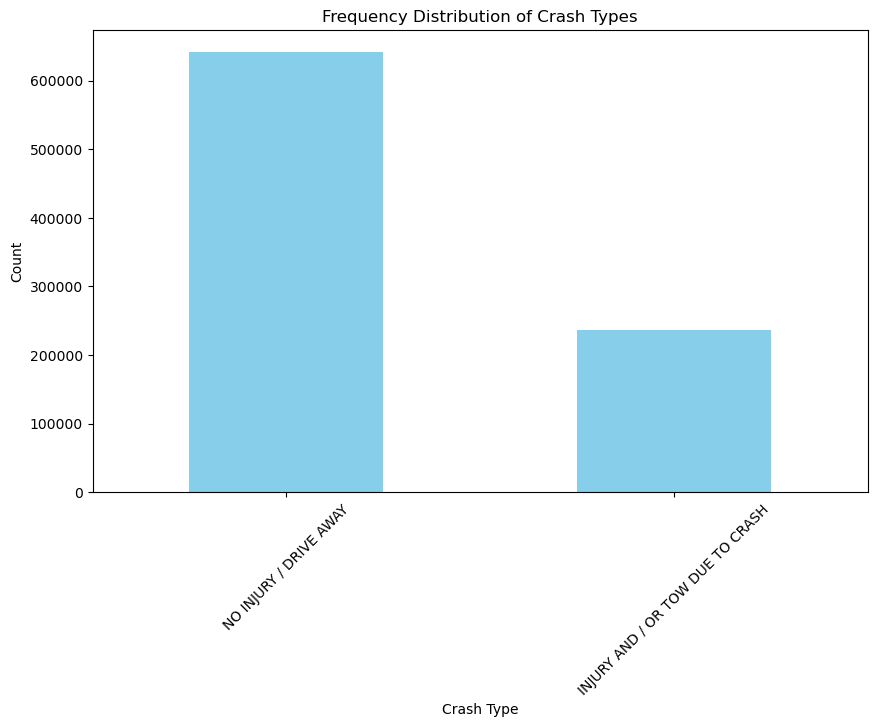

In [42]:
plt.figure(figsize=(10, 6))
crash_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Hypothesis 1

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


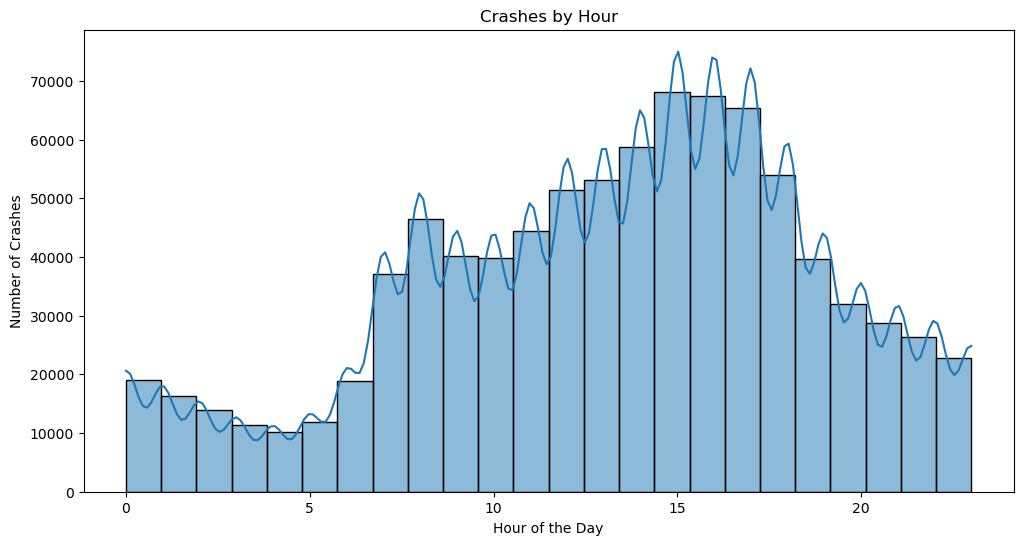

In [43]:
# Plot crashes by hour
plt.figure(figsize=(12, 6
                   ))
sns.histplot(df['crash_hour'], bins=24, kde=True)
plt.title('Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

In [44]:
# Convert the 'CRASH_DATE' column to datetime format
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p')

# Create separate columns for Date and Time
df['date'] = df['crash_date'].dt.date
df['time'] = df['crash_date'].dt.time

In [45]:
df['hour'] = df['time'].apply(lambda x: x.hour)
df['hour']

2         14
18        14
19         0
27        10
28        19
          ..
885761     0
885762     1
885763    21
885764    10
885765    10
Name: hour, Length: 877470, dtype: int64

In [46]:
df['dow'] = df['crash_date'].dt.day_name()

<Axes: xlabel='dow,hour'>

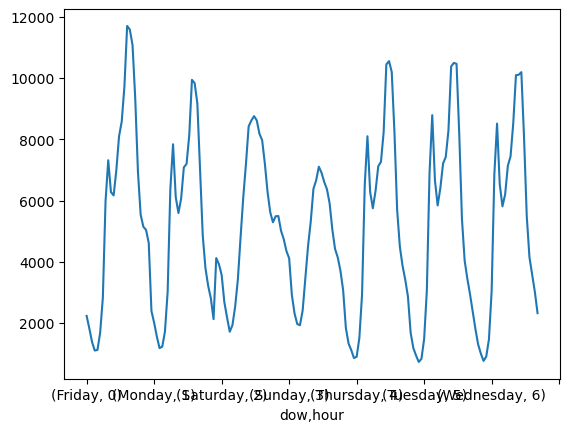

In [47]:
# day and hour chart

time_columns = ['dow', 'hour'] 
df.groupby(by=time_columns).size().plot()

<Axes: xlabel='hour', ylabel='dow'>

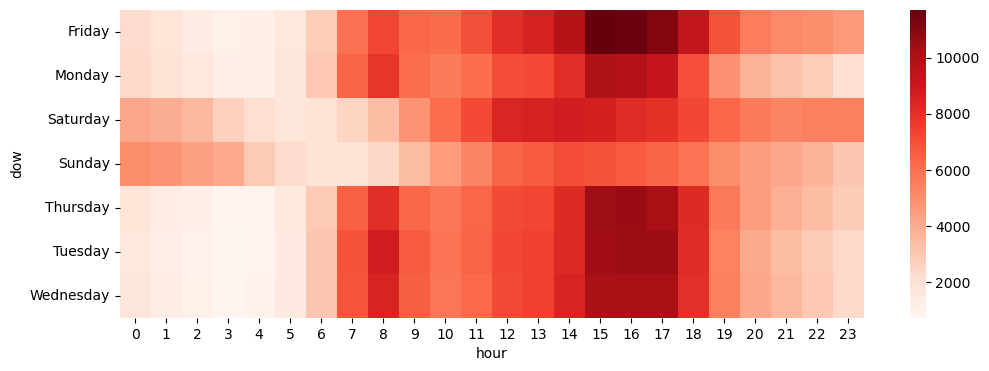

In [48]:
from seaborn import heatmap
from matplotlib.pyplot import figure
figure(figsize=(12, 4))
heatmap(data=df.groupby(by=time_columns).size().to_frame(name='count').reset_index().pivot(columns=time_columns[1],
                                                                                           index=time_columns[0],
                                                                                           values='count'),
       square=False, cmap='Reds')

In [56]:
#binning the CRASH_MONTH
month_bins = [1,4,7,10,13]
label=('Winter','Spring','Summer','Fall')
month_binned = pd.cut(df['crash_month'], month_bins, labels= label)
month_binned= month_binned.cat.as_unordered()
df['season']= month_binned

In [58]:
df['season'].value_counts()

season
Summer    244262
Spring    231349
Winter    197649
Fall      138764
Name: count, dtype: int64

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Fall')])

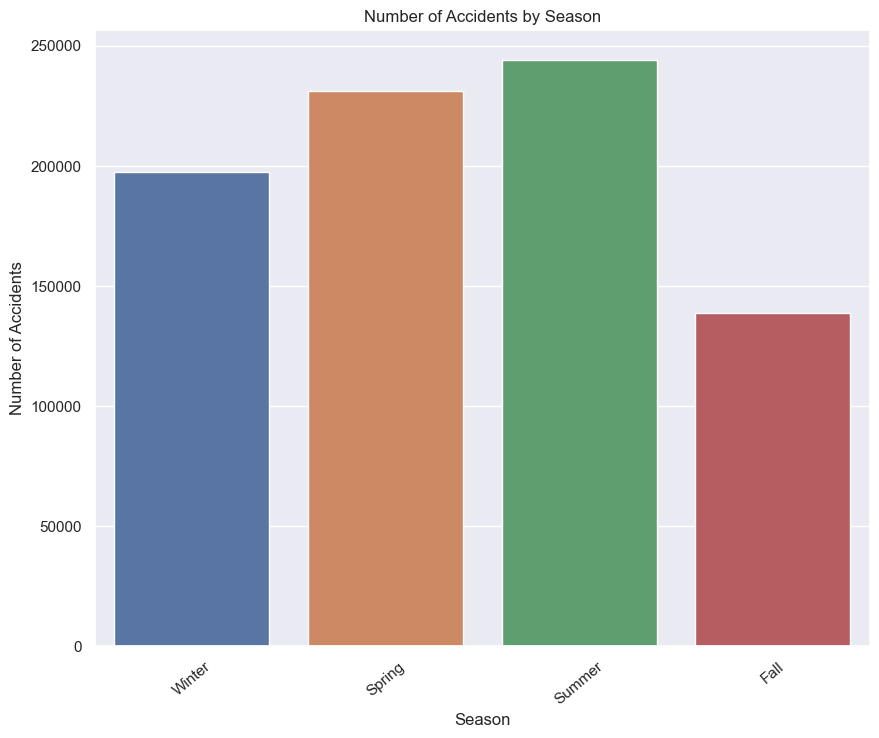

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(x="season", data=df)
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

# Hypothesis 2

In [49]:
df.columns

Index(['crash_date', 'posted_speed_limit', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment',
       'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'not_right_of_way_i', 'hit_and_run_i',
       'damage', 'prim_contributory_cause', 'sec_contributory_cause',
       'street_no', 'street_direction', 'street_name', 'beat_of_occurrence',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 'longitude', 'date', 'time', 'hour', 'dow'],
      dtype='object')

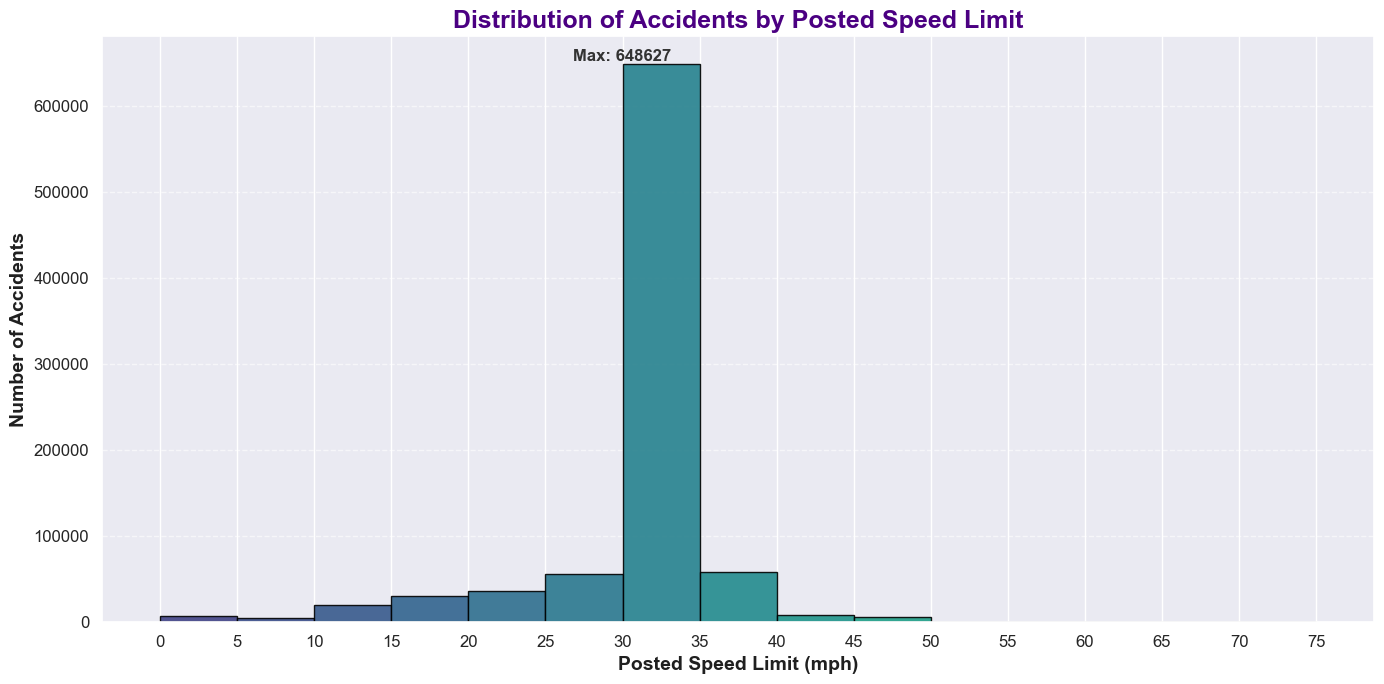

In [54]:
# Create a histogram
sns.set_theme(style="darkgrid")

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(range(0, 80, 5))))

plt.figure(figsize=(14, 7))
n, bins, patches = plt.hist(
    df['posted_speed_limit'], 
    bins=range(0, 80, 5), 
    edgecolor='black', 
    alpha=0.9
)

# Apply the gradient to the bars
for color, patch in zip(colors, patches):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Posted Speed Limit (mph)', fontsize=14, fontweight='bold', color='#1f1f1f')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold', color='#1f1f1f')
plt.title('Distribution of Accidents by Posted Speed Limit', fontsize=18, fontweight='bold', color='#4B0082')

# Customize tick marks
plt.xticks(range(0, 80, 5), fontsize=12)
plt.yticks(fontsize=12)

# Add subtle gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add a text annotation for the maximum bar
max_count = n.max()
max_bin = bins[np.argmax(n)]
plt.text(
    max_bin, max_count, 
    f'Max: {int(max_count)}', 
    ha='center', va='bottom', fontsize=12, fontweight='bold', color='#333'
)

# Final layout adjustments and display
plt.tight_layout()
plt.show()

# Hypothesis 3

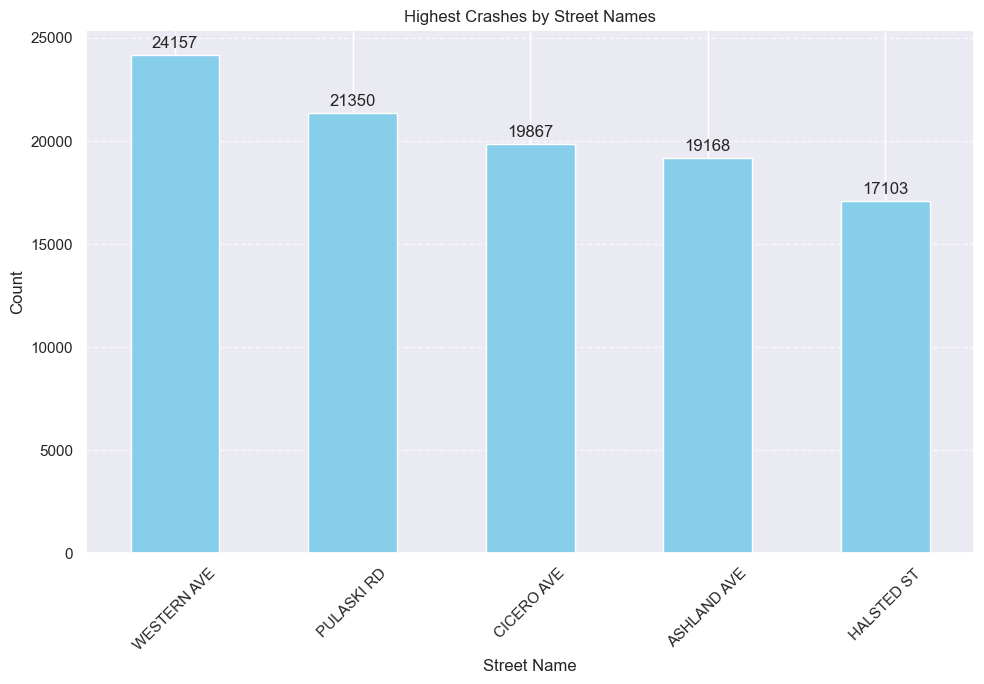

In [55]:
filtered_counts = df['street_name'].value_counts()

# Select top 5 weather conditions
top_5_counts = filtered_counts.head(5)

plt.figure(figsize=(10, 7))
ax = top_5_counts.plot(kind='bar', color='skyblue')
plt.title('Highest Crashes by Street Names')
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

plt.show()

In [69]:
df.columns

Index(['crash_date', 'posted_speed_limit', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment',
       'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'not_right_of_way_i', 'hit_and_run_i',
       'damage', 'prim_contributory_cause', 'sec_contributory_cause',
       'street_no', 'street_direction', 'street_name', 'beat_of_occurrence',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 'longitude', 'date', 'time', 'hour', 'dow', 'season',
       'index_column', 'i'],
      dtype='object')

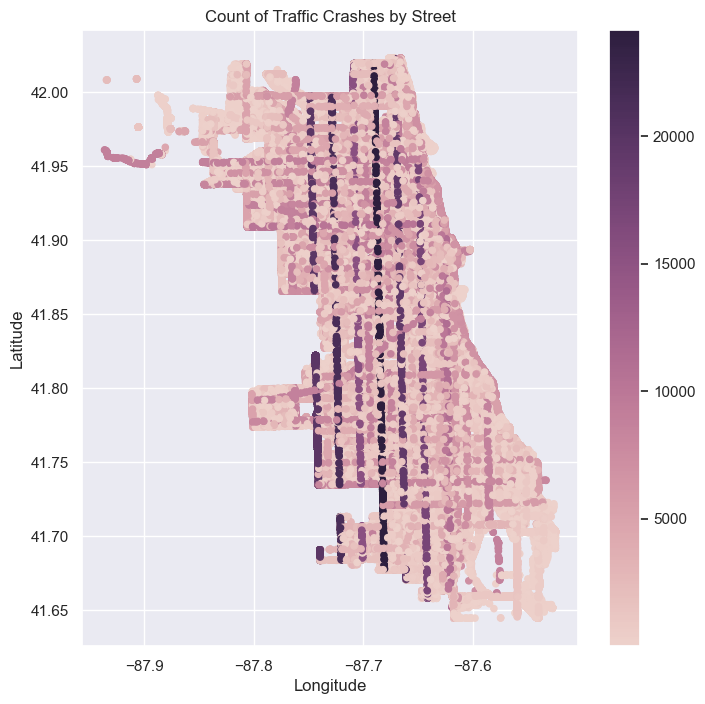

In [79]:
df_year = df
crash_count = df_year.groupby("street_name")["i"].count()
cmap = sns.cubehelix_palette(as_cmap=True)
fig, ax = plt.subplots()
hue = df_year["street_name"].apply(lambda street: crash_count[street])
points = ax.scatter(df_year["longitude"], df_year["latitude"], c=hue, s=20, cmap=cmap)
fig.colorbar(points)
fig.set_size_inches(8, 8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Count of Traffic Crashes by Street")
plt.show()

# Hypothesis 4

In [81]:
crash_df = df.groupby(by=['longitude','latitude']).size().reset_index(name='crashes')

In [83]:
crash_df.head()

,longitude,latitude,crashes
0,-87.936193,41.960822,1
1,-87.935877,41.960761,1
2,-87.934763,41.960230,3
3,-87.934510,42.008051,1
4,-87.934014,41.959123,1


In [91]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

In [123]:
df.columns

Index(['crash_date', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'not_right_of_way_i', 'hit_and_run_i',
       'damage', 'prim_contributory_cause', 'sec_contributory_cause',
       'street_no', 'street_direction', 'street_name', 'beat_of_occurrence',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 'longitude', 'date', 'time', 'hour', 'crash_day_of_week',
       'season', 'index_column', 'i', 'day_name', 'is_weekday'],
      dtype='object')

In [135]:
# Create the 'has_injuries' column
df['has_injuries'] = df['injuries_total'].apply(lambda x: 1 if x > 0 else 0)

# Optional: Print to check the new column
print(df[['injuries_total', 'has_injuries']].head())

   injuries_total  has_injuries
0             0.0             0
1             0.0             0
2             0.0             0
3             0.0             0
4             5.0             1


In [138]:
crash_df_ = df.groupby(by=['longitude','latitude']).agg(crashes=('injuries_total', 'count'), has_injuries=('has_injuries', 'max')).reset_index().query('crashes > 0')


In [139]:
crash_df_

,longitude,latitude,crashes,has_injuries
0,-87.936193,41.960822,1,0
1,-87.935877,41.960761,1,0
2,-87.934763,41.960230,3,0
3,-87.934510,42.008051,1,0
4,-87.934014,41.959123,1,0
...,...,...,...,...
315218,-87.524674,41.702590,8,1
315219,-87.524646,41.698928,1,0
315220,-87.524640,41.703323,1,0
315221,-87.524589,41.702571,4,1


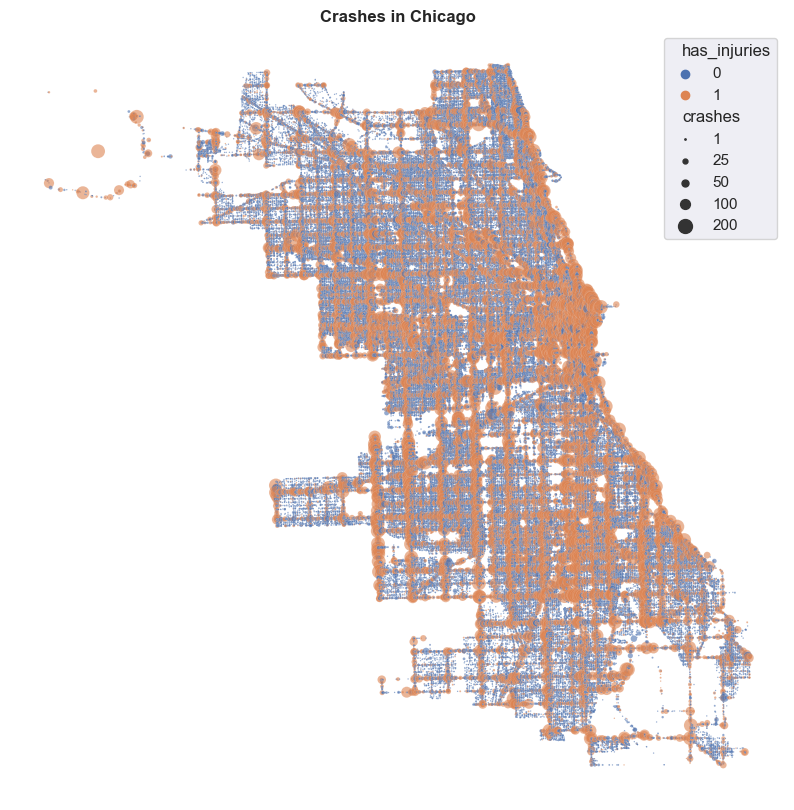

In [140]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_, x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago',fontweight='bold');